In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pes_bs_utils import parse_energy_cc, parse_energy_hf,parse_energy
from scipy.interpolate import InterpolatedUnivariateSpline as sp
df_sa_bsc=pd.read_pickle("./df_sa_bsc")
atoms_path="/home/giorgiod/MRCC_interface/Atoms/"  
basisSets=['sto-3G', 'sto-6G','3-21G','6-31G*','def2-TZVP','def2-QZVPP','cc-pvtz','aug-cc-pVQZ']
atoms="H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al"
atoms=atoms.split(',')

atoms_mol={'HAl':['H','Al'],'HeMg':['He','Mg'],'LiNa':['Li','Na'],\
           'BeNe':['Be','Ne'],'BF':['B','F'],'CO':['C','O'],'NN':['N','N']}
"""def energy(bs,targ,ref,hf=False,mp2=False):
    logfile=atoms_path+'{}/{}/{}_at_{}/run.log'.format(bs,targ,targ,ref)
    if hf:
            return parse_energy_hf(logfile)
    return parse_energy_cc(logfile)"""
def bsc(ref,target):
    return float(df_sa_bsc.query("basis_set=='def2-QZVPP'&ref==@ref&target==@target").bsc )
    """return \
    energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[ref][0])\
    +energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[ref][1]) \
    -energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[target][0])\
    -energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[target][1])"""
bsc('NN','CO')

0.01234583452800564

In [2]:
dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
hfmp2dft=pd.read_pickle('hfmp2dft_def2qzvpp')  #pes at hf, mp2 ,PBE and B3LYP
#hfmp2dft.query("calc=='PBE' & mol=='CO' ").energy-


In [3]:
"""path_atoms_dft="/home/giorgiod/Desktop/MRCC_interface/DFT_BFCONN/Atoms/{}_{}/run.log" #.format(atom,{PBE,B3LYP})
path_atoms_ccsd="/home/giorgiod/Desktop/MRCC_interface/Atoms/def2-QZVPP/{}/{}_at_{}/run.log" #.format(targ,targ,ref) 
parse_energy(path_atoms_ccsd.format("O","O","C"),"ccsd")"""

'path_atoms_dft="/home/giorgiod/Desktop/MRCC_interface/DFT_BFCONN/Atoms/{}_{}/run.log" #.format(atom,{PBE,B3LYP})\npath_atoms_ccsd="/home/giorgiod/Desktop/MRCC_interface/Atoms/def2-QZVPP/{}/{}_at_{}/run.log" #.format(targ,targ,ref) \nparse_energy(path_atoms_ccsd.format("O","O","C"),"ccsd")'

Now we only consider alchemies from NN to CO :: from CO to NN and BF :: from BF to CO <br>
2^nd and 4^th order alchemy VS HF and MP2, true CCSD of the target as a reference.



In [4]:
"""def atoms_energy(mol,calc,ref="ref"):
    a1,a2=atoms_mol[mol][0],atoms_mol[mol][1]
    if ref != "ref":
        r1,r2=atoms_mol[ref][0],atoms_mol[ref][1]
    if calc=="ccsd" or calc=="HF" or calc=="MP2":
        return parse_energy(path_atoms_ccsd.format(a1,a1,a1),calc)+parse_energy(path_atoms_ccsd.format(a2,a2,a2),calc)
    if calc=="PBE" or calc=="B3LYP":
        return parse_energy(path_atoms_dft.format(a1,calc),calc)+parse_energy(path_atoms_dft.format(a2,calc),calc)
    if calc=="alchemy":
        return parse_energy(path_atoms_ccsd.format(a1,a1,r1),"ccsd")+parse_energy(path_atoms_ccsd.format(a2,a2,r2),"ccsd")"""

'def atoms_energy(mol,calc,ref="ref"):\n    a1,a2=atoms_mol[mol][0],atoms_mol[mol][1]\n    if ref != "ref":\n        r1,r2=atoms_mol[ref][0],atoms_mol[ref][1]\n    if calc=="ccsd" or calc=="HF" or calc=="MP2":\n        return parse_energy(path_atoms_ccsd.format(a1,a1,a1),calc)+parse_energy(path_atoms_ccsd.format(a2,a2,a2),calc)\n    if calc=="PBE" or calc=="B3LYP":\n        return parse_energy(path_atoms_dft.format(a1,calc),calc)+parse_energy(path_atoms_dft.format(a2,calc),calc)\n    if calc=="alchemy":\n        return parse_energy(path_atoms_ccsd.format(a1,a1,r1),"ccsd")+parse_energy(path_atoms_ccsd.format(a2,a2,r2),"ccsd")'

In [5]:
"""q=[]
for mol in ['BF','CO','NN']:
    for calc in ['ccsd',"HF",'MP2','PBE','B3LYP']:
        ea=float(atoms_energy(mol,calc))
        q.append({'mol':mol,'calc':calc,"atoms_energy":ea})        
pd.DataFrame(q).to_pickle("data_freq_en_isol_atoms")"""

'q=[]\nfor mol in [\'BF\',\'CO\',\'NN\']:\n    for calc in [\'ccsd\',"HF",\'MP2\',\'PBE\',\'B3LYP\']:\n        ea=float(atoms_energy(mol,calc))\n        q.append({\'mol\':mol,\'calc\':calc,"atoms_energy":ea})        \npd.DataFrame(q).to_pickle("data_freq_en_isol_atoms")'

In [6]:
isol_atoms=pd.read_pickle("data_freq_en_isol_atoms")
isol_atoms
def atoms_energy(mol,calc):
    return float(isol_atoms.query("mol==@mol & calc==@calc").atoms_energy)

In [7]:
# for masses reference  https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl
m_B=10.806
m_C=12.0096
m_N=14.006
m_O=15.999
m_F=18.998

# https://physics.nist.gov/cgi-bin/cuu/Value?u|search_for=physchem_in! ++ https://physics.nist.gov/cgi-bin/cuu/Value?me  
dalton_to_au=  1.660e-27 / 9.109e-31

mu_nn=12766.4683422
mu_nn=m_N/2 *dalton_to_au
mu_co=m_C*m_O/(m_C+m_O)*dalton_to_au
mu_bf=m_B*m_F/(m_B+m_F)*dalton_to_au
lightspeed=137.035999753
planck=6.28318530718
centimeter=188972613.392
kcal_mol=627.509
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed
print(mu_nn,mu_bf,mu_co)

12762.081457898783 12552.657457934376 12501.650854791682


In [8]:
def sppes(scan):
    points=np.linspace(1.3,3.2,20)
    target_pts=np.linspace (1.3,3.2,1901) # points 20 in 1.3-3.2 (1.9bohrs)
    bspline=sp(points,scan)
    return bspline(target_pts)

In [9]:
#frequencies !!! only for linspace of e-3 bohr  !!!
def freq(spline,mol):
    red_masses={'NN':mu_nn,'CO':mu_co,'BF':mu_bf}
    Mu=red_masses[mol]
    min_true=np.argmin(spline)
    k_true=(spline[min_true-1]+spline[min_true+1]-2*spline[min_true])*1.e+6
    return to_cm(k_true,Mu)

In [10]:
#This was for seminar _ cancel line for NC

def Plot(ax,ref,target):
    target_pts=np.linspace (1.3,3.2,1901)
    spline_ccsd=sppes(dt_qzvpp.query("alchemy==0 &ref==@ref & target==@target").e_ccsd)-atoms_energy(target,"ccsd")
    spline_alch2=sppes(dt_qzvpp.query("alchemy==2 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    spline_alch4=sppes(dt_qzvpp.query("alchemy==4 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
  #  spline_alch4_NC=sppes(dt_qzvpp.query("alchemy==4 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")
    spline_hf=sppes(hfmp2dft.query("calc=='HF' & mol==@target").energy)-atoms_energy(target,"HF")
    spline_mp2=sppes(hfmp2dft.query("calc=='MP2' & mol==@target").energy)-atoms_energy(target,"MP2")
    spline_pbe=sppes(hfmp2dft.query("calc=='PBE' & mol==@target").energy)-atoms_energy(target,"PBE")
    spline_b3lyp=sppes(hfmp2dft.query("calc=='B3LYP' & mol==@target").energy)-atoms_energy(target,"B3LYP")
    
    ax[0].plot(target_pts,spline_ccsd*kcal_mol,label='CCSD',color='C0',lw=3.)
    ax[0].plot(target_pts,spline_alch4*kcal_mol,label='APDFT5',color='C1',lw=3.,ls='-.' )
    ax[0].plot(target_pts,spline_alch2*kcal_mol,label='APDFT3',color='C2',lw=3.,ls=(0, (5, 3, 2, 3)) )    
    ax[0].plot(target_pts,spline_mp2*kcal_mol,label="MP2",color='C3',lw=4.,ls=(0, (5, 5, 1, 5)))
    ax[0].plot(target_pts,spline_pbe*kcal_mol,label='PBE',color='C4',lw=3.,ls=':')
    ax[0].plot(target_pts,spline_b3lyp*kcal_mol,label='B3LYP',color='C5',lw=3.,ls= '--')
#   ax[0].plot(target_pts,spline_alch4_NC*kcal_mol,label='Alchemy $4^{th}$ ',color='C5',lw=3.,ls='-.' )
# [ '-' | '--' | '-.' | ':' | 'steps' | ...]

    minim=min([min(spline_alch4),min(spline_mp2),min(spline_alch4),min(spline_pbe),min(spline_b3lyp)])
    ax[0].set(xlim=(1.9,2.5),ylim=(minim*kcal_mol-5, minim*kcal_mol+60 ))

    ax[1].bar(0,freq(spline_alch4,target),color='C2',label='APDFT3')
    ax[1].bar(1,freq(spline_alch4,target),color='C1',label='APDFT5')
    ax[1].bar(2,freq(spline_ccsd,target),color='C0',label='CCSD')
    ax[1].bar(3,freq(spline_mp2,target),color='C3',label='MP2')    
    ax[1].bar(4,freq(spline_pbe,target),color='C4',label='PBE')    
    ax[1].bar(5,freq(spline_b3lyp,target),color='C5',label="B3LYP")    
    

In [11]:
# We can use bsc database need to store atoms energy for ccsd only once 
# atoms_energy("CO","ccsd")+bsc("NN","CO") = atoms_energy("CO","alchemy",ref="NN")

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


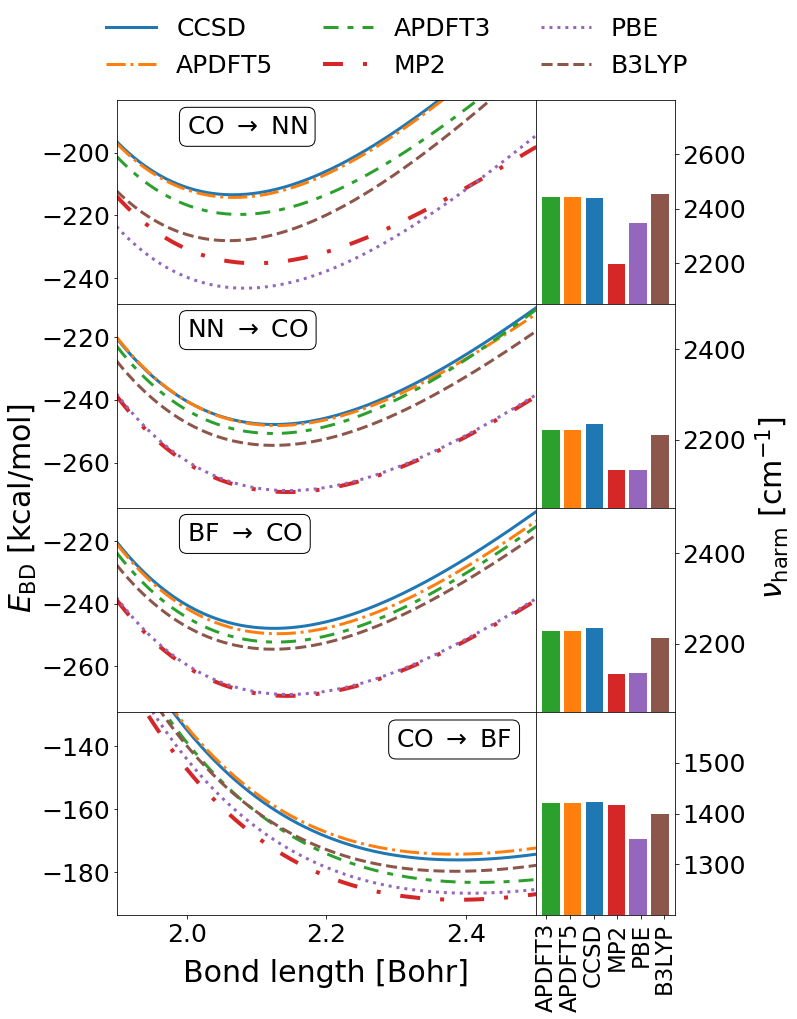

In [20]:
fig=plt.figure(figsize=(10,15))

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel("$E_{\mathrm{BD}}$ [kcal/mol]",fontsize=30,labelpad=55)
#plt.axes().set_xlabel(r'Bond length [Bohr]       $\nu_{\mathrm{harm}}$ [cm$^{-1}$]',fontsize=25,labelpad=20)
plt.axes().set_frame_on(False)

subplspec={'width_ratios' :[3,1], 'wspace':0,'hspace':0}
axs=fig.subplots(4,2,gridspec_kw=subplspec)


for ax in axs.T[:][1]: ax.yaxis.tick_right(),ax.xaxis.set_ticks([])
Plot(axs[0],'CO','NN')
Plot(axs[1],'NN','CO')
Plot(axs[2],'BF','CO')
Plot(axs[3],'CO','BF')
axs[0][0].xaxis.set_ticks([]),axs[1][0].xaxis.set_ticks([]),axs[2][0].xaxis.set_ticks([])

#axs[0][0].yaxis.set_ticks([]),axs[1][0].yaxis.set_ticks([]),axs[2][0].yaxis.set_ticks([])

axs[0][1].set(ylim=(2050,2800)),axs[1][1].set(ylim=(2050,2500)),axs[2][1].set(ylim=(2050,2500)),axs[3][1].set(ylim=(1200,1600))

for ax in axs:
    for axg in ax:
        axg.tick_params(labelsize=25)
        axg.yaxis.set_ticks(axg.get_yticks()[1:-1])
axs[3,0].set_xticks([2.,2.2,2.4])
axs[3,1].set_xticks([-0.2,0.88,1.96,3.04,4.12,5.2])
axs[3,1].set_xticklabels(['APDFT3','APDFT5','CCSD','MP2','PBE','B3LYP'],rotation=90,fontsize=23,ha='center')#fontweight='demi')

box_prop=dict(boxstyle='round', facecolor='white', alpha=1.)
axs[0][0].text(2.0,-194, r'CO $\rightarrow$ NN',fontsize=25,bbox=box_prop)
axs[1][0].text(2.0,-220, r'NN $\rightarrow$ CO',fontsize=25,bbox=box_prop)
axs[2][0].text(2.0,-220, r'BF $\rightarrow$ CO',fontsize=25,bbox=box_prop)
axs[3][0].text(2.3,-140, r'CO $\rightarrow$ BF',fontsize=25,bbox=box_prop)

axs[3][0].text(2.2,-215,'Bond length [Bohr]',ha='center',fontsize=30)
axs[2][1].set_ylabel(r'$\nu_{\mathrm{harm}}$ [cm$^{-1}$]',fontsize=30,labelpad=-255,position=[1,1.])
#axs[2][1].tick_params(axis='y', which='both', labelleft=False,labelright=True)

#axs[0][1].legend(ncol=3,bbox_to_anchor=(0.25,1.21,.8,.2),fontsize=20,markerscale=.05)
axs[0][0].legend(ncol=3,fontsize=25,loc='lower left',bbox_to_anchor=(-0.08,1),frameon=False)
plt.savefig('freq_graph.pdf',bbox_inches="tight",dpi=300)

In [13]:
def Em_Rm_Nu(ref,target):
    target_pts=np.linspace (1.3,3.2,1901)
    spline_ccsd=sppes(dt_qzvpp.query("alchemy==0 &ref==@ref & target==@target").e_ccsd)-atoms_energy(target,"ccsd")
    spline_alch0=sppes(dt_qzvpp.query("alchemy==0 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    spline_alch1=sppes(dt_qzvpp.query("alchemy==1 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    spline_alch2=sppes(dt_qzvpp.query("alchemy==2 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    spline_alch3=sppes(dt_qzvpp.query("alchemy==3 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    spline_alch4=sppes(dt_qzvpp.query("alchemy==4 &ref==@ref & target==@target").e_alch)-atoms_energy(target,"ccsd")-bsc(ref,target)
    
    spline_hf=sppes(hfmp2dft.query("calc=='HF' & mol==@target").energy)-atoms_energy(target,"HF")
    spline_mp2=sppes(hfmp2dft.query("calc=='MP2' & mol==@target").energy)-atoms_energy(target,"MP2")
    spline_pbe=sppes(hfmp2dft.query("calc=='PBE' & mol==@target").energy)-atoms_energy(target,"PBE")
    spline_b3lyp=sppes(hfmp2dft.query("calc=='B3LYP' & mol==@target").energy)-atoms_energy(target,"B3LYP")
    
    q=[]
    q.append({'calc':"CCSD",'Em': np.round(spline_ccsd.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_ccsd.argmin()],2),'Nu':int(freq(spline_ccsd,target))})
    q.append({'calc':"APDFT1",'Em': np.round(spline_alch0.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_alch0.argmin()],2),'Nu':int(freq(spline_alch0,target))})
    q.append({'calc':"APDFT2",'Em': np.round(spline_alch1.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_alch1.argmin()],2),'Nu':int(freq(spline_alch1,target))})
    q.append({'calc':"APDFT3",'Em': np.round(spline_alch2.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_alch2.argmin()],2),'Nu':int(freq(spline_alch2,target))})
    q.append({'calc':"APDFT4",'Em': np.round(spline_alch3.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_alch3.argmin()],2),'Nu':int(freq(spline_alch3,target))})
    q.append({'calc':"APDFT5",'Em': np.round(spline_alch4.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_alch4.argmin()],2),'Nu':int(freq(spline_alch4,target))})

    q.append({'calc':"HF",'Em': np.round(spline_hf.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_hf.argmin()],2),'Nu':int(freq(spline_hf,target))})
    q.append({'calc':"MP2",'Em': np.round(spline_mp2.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_mp2.argmin()],2),'Nu':int(freq(spline_mp2,target))})
    q.append({'calc':"PBE",'Em': np.round(spline_pbe.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_pbe.argmin()],2),'Nu':int(freq(spline_pbe,target))})
    q.append({'calc':"B3LYP",'Em': np.round(spline_b3lyp.min()*kcal_mol,2), 'Rm':np.round(target_pts[spline_b3lyp.argmin()],2),'Nu':int(freq(spline_b3lyp,target))})

    return(q)

In [14]:
target_pts=np.linspace (1.3,3.2,1901)
spline_ccsd=sppes(dt_qzvpp.query("alchemy==0 &ref=='CO' & target=='NN'").e_ccsd)-atoms_energy("NN","ccsd")
spline_ccsd
np.round(spline_ccsd.min()*kcal_mol,3)
np.round(target_pts[spline_ccsd.argmin()],2)
int(np.round(freq(spline_ccsd,"NN")))

2440

In [15]:
int(1.7)

1

In [16]:
for (ref,target) in [("CO","NN"),("NN","CO"),("BF","CO"),("CO","BF")]:
    print(pd.DataFrame(Em_Rm_Nu(ref,target)).to_latex())

\begin{tabular}{lrrrl}
\toprule
{} &       Em &    Nu &    Rm &    calc \\
\midrule
0 &  -213.43 &  2439 &  2.07 &    CCSD \\
1 &  1827.97 &  3118 &  1.90 &  APDFT1 \\
2 &  -210.76 &  2425 &  2.07 &  APDFT2 \\
3 &  -219.71 &  2388 &  2.08 &  APDFT3 \\
4 &  -214.22 &  2445 &  2.07 &  APDFT4 \\
5 &  -214.29 &  2444 &  2.07 &  APDFT5 \\
6 &  -117.32 &  2728 &  2.01 &      HF \\
7 &  -235.28 &  2197 &  2.10 &     MP2 \\
8 &  -243.22 &  2347 &  2.08 &     PBE \\
9 &  -228.07 &  2453 &  2.06 &   B3LYP \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrl}
\toprule
{} &       Em &    Nu &    Rm &    calc \\
\midrule
0 &  -247.87 &  2234 &  2.12 &    CCSD \\
1 &  1805.18 &  2954 &  1.93 &  APDFT1 \\
2 &  -250.73 &  2270 &  2.12 &  APDFT2 \\
3 &  -250.73 &  2270 &  2.12 &  APDFT3 \\
4 &  -248.22 &  2222 &  2.13 &  APDFT4 \\
5 &  -248.22 &  2222 &  2.13 &  APDFT5 \\
6 &  -175.58 &  2427 &  2.08 &      HF \\
7 &  -269.41 &  2133 &  2.14 &     MP2 \\
8 &  -268.94 &  2134 &  2.14 &     PBE \\
9 &  -2

In [17]:
pd.DataFrame(Em_Rm_Nu("CO","NN"))
pd.DataFrame(Em_Rm_Nu("CO","NN"))

,Em,Nu,Rm,calc
0,-213.43,2439,2.07,CCSD
1,1827.97,3118,1.90,APDFT1
2,-210.76,2425,2.07,APDFT2
3,-219.71,2388,2.08,APDFT3
4,-214.22,2445,2.07,APDFT4
5,-214.29,2444,2.07,APDFT5
6,-117.32,2728,2.01,HF
7,-235.28,2197,2.10,MP2
8,-243.22,2347,2.08,PBE
9,-228.07,2453,2.06,B3LYP


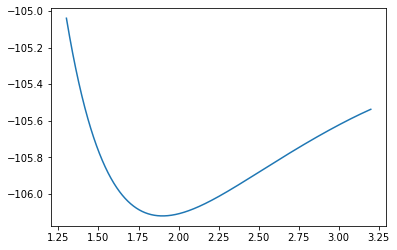

In [18]:
plt.plot( target_pts,sppes(dt_qzvpp.query("alchemy==0 &ref=='CO' & target=='NN'").e_alch))#-atoms_energy('NN',"ccsd")-bsc('CO','NN'))

In [19]:
-atoms_energy('NN',"ccsd")-bsc('CO','NN')

109.03366612442099